<a href="https://colab.research.google.com/github/Auxilus08/DHV/blob/main/Practical7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tcs = yf.download('TCS.NS', start="2020-01-01", end="2025-09-01")
print(tcs.head())

/tmp/ipython-input-239143237.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tcs = yf.download('TCS.NS', start="2020-01-01", end="2025-09-01")
[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open   Volume
Ticker           TCS.NS       TCS.NS       TCS.NS       TCS.NS   TCS.NS
Date                                                                   
2020-01-01  1907.124268  1921.465360  1895.158464  1907.476115  1354908
2020-01-02  1898.370117  1917.990421  1890.935577  1917.990421  2380752
2020-01-03  1936.202881  1955.867219  1903.957113  1903.957113  4655761
2020-01-06  1936.026978  1958.462702  1924.985039  1940.030258  3023209
2020-01-07  1940.778320  1948.520673  1921.377974  1936.071131  2429317


/tmp/ipython-input-32832068.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


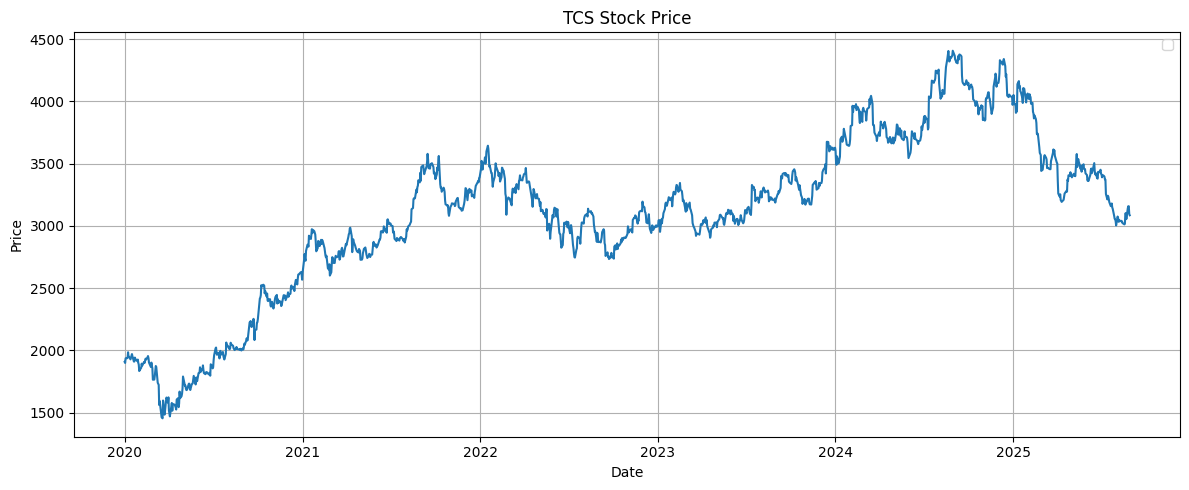

In [3]:
plt.figure(figsize=(12, 5))
plt.plot(tcs['Close'])
plt.title('TCS Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

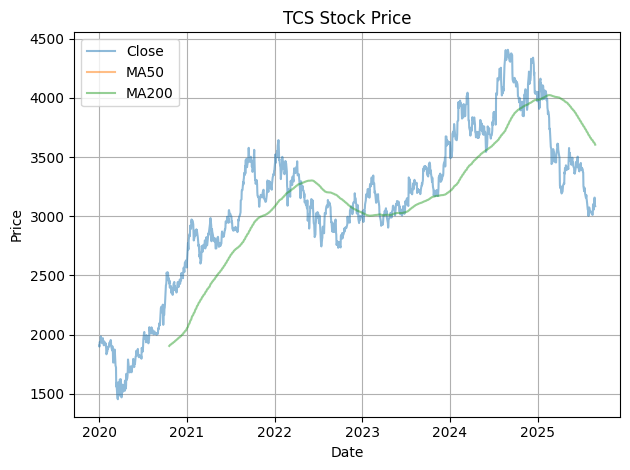

In [7]:
tcs['MA50'] = tcs['Close'].rolling(window=50).mean()
tcs['MA200'] = tcs['Close'].rolling(window=200).mean()
plt.plot(tcs['Close'], label='Close', alpha=0.5)
plt.plot(tcs['MA50'], label='MA50', alpha=0.5)
plt.plot(tcs['MA200'], label='MA200', alpha=0.5)
plt.title('TCS Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
np.random.seed(42)
months = pd.date_range(start='2018-01-01', periods=72, freq='M')
consumption = 300 + np.linspace(0, 50, 72) + 40 * np.sin(np.linspace(0, 12*np.pi, 72)) + np.random.normal(0, 20, 72)
df = pd.DataFrame()